<a href="https://colab.research.google.com/github/Wzhhhh0815/Learning/blob/master/Pytorch%E5%85%A5%E9%97%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

详细教程见https://pytorch.org/tutorials/beginner/basics/intro.html

# QuickStart

## 数据处理
PyTorch有两个处理数据的原语:  
1.**DataSet**:用于存储样本以及对应的标签   
2.**Dataloader**:包装Dataset为一个迭代对象

Dataset中有许多特定类型的包，TorchText, TorchVision, and TorchAudio  
TorchVision包含了许多数据集，CIFAR和COCO等，并且TorchVision中包含两个参数：transform 和 target_transform，分别用于修改样本和标签。

In [21]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [23]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",   # 数据的保存位置
    train=True,   # 我们希望数据用于训练集，其中6万张图片用作训练数据，1万张图片用于测试数据
    download=True,  # 如果目录下没有文件，则自动下载
    transform=ToTensor(), # 我们将数据转为Tensor类型
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

**数据处理详细内容见 loading data**


---



In [24]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [25]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


搭建模型详见building neural networks


---



In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [27]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.295810  [   64/60000]
loss: 2.291672  [ 6464/60000]
loss: 2.267780  [12864/60000]
loss: 2.259195  [19264/60000]
loss: 2.239912  [25664/60000]
loss: 2.209444  [32064/60000]
loss: 2.210826  [38464/60000]
loss: 2.178555  [44864/60000]
loss: 2.178773  [51264/60000]
loss: 2.147815  [57664/60000]
Test Error: 
 Accuracy: 46.1%, Avg loss: 2.139840 

Epoch 2
-------------------------------
loss: 2.151376  [   64/60000]
loss: 2.148444  [ 6464/60000]
loss: 2.079738  [12864/60000]
loss: 2.096866  [19264/60000]
loss: 2.045483  [25664/60000]
loss: 1.980973  [32064/60000]
loss: 2.005614  [38464/60000]
loss: 1.925346  [44864/60000]
loss: 1.929353  [51264/60000]
loss: 1.858458  [57664/60000]
Test Error: 
 Accuracy: 57.9%, Avg loss: 1.855844 

Epoch 3
-------------------------------
loss: 1.888844  [   64/60000]
loss: 1.866237  [ 6464/60000]
loss: 1.733374  [12864/60000]
loss: 1.781238  [19264/60000]
loss: 1.672497  [25664/60000]
loss: 1.624079  [32064/600

训练模型详见OPTIMIZING MODEL PARAMETERS


---




In [28]:
# save model
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [29]:
# loading model
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [30]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


保存与加载模型见Saving & Loading your model


---




# loading data

## Loading a Dataset
采用以下方式加载数据集：
* root是存储训练/测试数据的路径，

* train指定训练或测试数据集，

* download=True会在root中没有数据时从互联网下载。

* transform和target_transform对特征以及标签进行预处理。



In [32]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

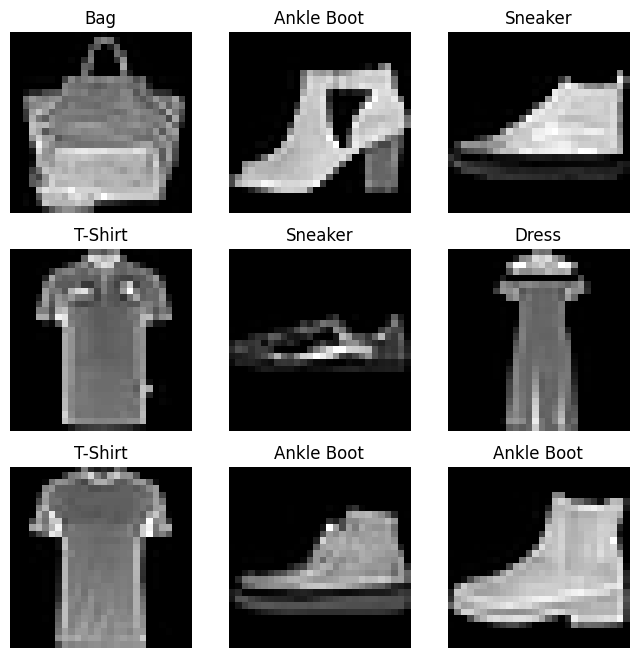

In [34]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

In [35]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):     # 在实例初始化时运行一次
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):      # 返回数据集中样本数量
        return len(self.img_labels)

    def __getitem__(self, idx): # 加载数据，并根据idx以及相应要求返回数据集中相应的样本
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])   # 用于拼接文件
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing your data for training with DataLoaders

In [36]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


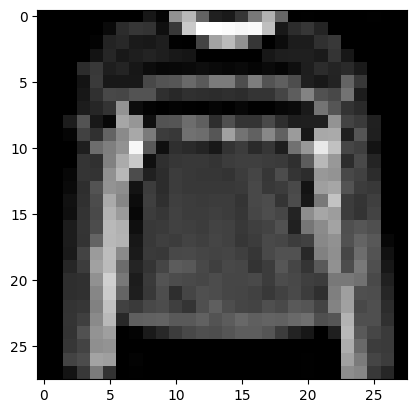

Label: 2


In [37]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# building neural networks

In [38]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Get Device for Training

In [39]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


## Define the Class

In [40]:
class NeuralNetwork(nn.Module):
    def __init__(self):     # 定义网络
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):   # 定义数据的处理
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [41]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


使用模型时，我们将输入数据传递给它。这会执行模型的前向计算以及一些后台操作。不要直接调用model.forward()！

在输入上调用模型会返回一个二维张量，dim=0对应于每个类别的10个原始预测值的输出，并且dim=1对应于每个输出的单独值。通过将其传递到nn.Softmax模块实例中，我们可以获得预测概率。

In [44]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(logits)
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[ 0.0201, -0.0253, -0.0134, -0.0173, -0.0280,  0.0391, -0.1148,  0.0847,
          0.0249, -0.0246]], grad_fn=<AddmmBackward0>)
tensor([[0.1025, 0.0979, 0.0991, 0.0987, 0.0976, 0.1044, 0.0895, 0.1093, 0.1030,
         0.0980]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([7])


## Model Layers
使用一个有3个图片的小批量来掩饰

In [45]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [46]:
#nn.Flatten将图像转换为784（28*28）个像素的数组
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [47]:
# Linear层使用存储的权重和偏置对输入进行线性变换
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [49]:
# 非线性激活函数用于线性变化之后，帮助模型学习更多的特征
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[0.2663, 0.3580, 0.0000, 0.0187, 0.0000, 0.0000, 0.0000, 0.0606, 0.0000,
         0.3170, 0.0000, 0.1040, 0.0000, 0.2718, 0.0839, 0.0000, 0.0704, 0.4031,
         0.0000, 0.4637],
        [0.2718, 0.0218, 0.0000, 0.1788, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.8853, 0.0000, 0.1478, 0.0000, 0.0000, 0.0000, 0.0000, 0.0261, 0.2992,
         0.0451, 0.0966],
        [0.2056, 0.3264, 0.0000, 0.0658, 0.1338, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5762, 0.0000, 0.0150, 0.0000, 0.3037, 0.0000, 0.0000, 0.0000, 0.3297,
         0.0000, 0.3419]], grad_fn=<ReluBackward0>)


After ReLU: tensor([[0.2663, 0.3580, 0.0000, 0.0187, 0.0000, 0.0000, 0.0000, 0.0606, 0.0000,
         0.3170, 0.0000, 0.1040, 0.0000, 0.2718, 0.0839, 0.0000, 0.0704, 0.4031,
         0.0000, 0.4637],
        [0.2718, 0.0218, 0.0000, 0.1788, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.8853, 0.0000, 0.1478, 0.0000, 0.0000, 0.0000, 0.0000, 0.0261, 0.2992,
         0.0451, 0.0966],
       

In [50]:
# nn.Sequential是一个有序的模型容器，能够快速搭建模型
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [52]:
# 神经网络的最后一个线性层返回logits，在[-infty，infty]范围内的原始值
# 这些值传递给nn.Softmax模块。 logits被缩放为表示每个类别的模型预测概率的值[0,1]。 dim参数指示沿其必须总和为1的维度。
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [53]:
# 通过子类化nn.Module可以自动跟踪模型对象中定义的所有字段
# 并使用您的模型的parameters()或named_parameters()方法使所有参数可访问。
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0347,  0.0130,  0.0196,  ...,  0.0267,  0.0240, -0.0136],
        [ 0.0084,  0.0193,  0.0009,  ...,  0.0220, -0.0245,  0.0058]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0069, 0.0125], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0441,  0.0432,  0.0243,  ...,  0.0370, -0.0417,  0.0228],
        [-0.0342,  0.0061,  0.0105,  ..., -0.0423,  0.0186, -0.0154]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si